## IMAGE AS DATA: CHANGING IMAGE

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Load the image
data = plt.imread('bricks.png')

# Display the image
plt.imshow(data)

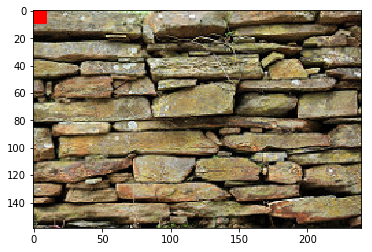

In [2]:
# Set the red channel in this part of the image to 1
data[:10, :10, 0] = 1

# Set the green channel in this part of the image to 0
data[:10, :10, 1] = 0

# Set the blue channel in this part of the image to 0
data[:10, :10, 2] = 0

# Visualize the result
plt.imshow(data)

## ONE-HOT ENCODING TO REPRESENT IMAGES

= to_categorical in keras

In [3]:
# The number of image categories
n_categories = 3

# The unique values of categories in the data
import numpy as np
categories = np.array(["shirt", "dress", "shoe"])

# Original labels to be encoded to matrix
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(categories == labels[ii])
    # Set the corresponding zero to one
    ohe_labels[ii, jj] = 1
    
print(ohe_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


## EVALUATE A CLASSIFIER (ACCURACY)

In [4]:
test_labels = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 1., 0.]])
    
predictions = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [1., 0., 0.], # => wrong prediction
                        [0., 0., 1.],
                        [1., 0., 0.], # => wrong prediction
                        [0., 0., 1.],
                        [0., 1., 0.]])

In [5]:
# Calculate the number of correct predictions
number_correct = (test_labels * predictions).sum()
print(number_correct)

6.0


In [6]:
# Calculate the proportion of correct predictions
proportion_correct = number_correct/len(predictions)
print(proportion_correct)

0.75


## NEURAL NETWORK 

In [7]:
fashion = np.load('fashion.npz')
fashion.zip

<zipfile.ZipFile file=<_io.BufferedReader name='fashion.npz'> mode='r'>

In [8]:
lst = fashion.files
lst

['arr_0']

In [9]:
matrix = fashion['arr_0']
list = matrix.tolist()

In [10]:
test_data = list['test_data']
test_labels = list['test_labels']
train_data = list['train_data']
train_labels = list['train_labels']

In [11]:
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
# Dense layers, meaning that each unit in each layer is connected to all of the units in the previous layer.
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Using TensorFlow backend.


In [12]:
train_data.shape

(50, 28, 28, 1)

In [13]:
# Reshape the data to two-dimensional array (50 images of flatten arrays)
train_data = train_data.reshape(50, 784)

In [14]:
# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 4s 101ms/step - loss: 1.0344 - acc: 0.5500 - val_loss: 0.9836 - val_acc: 0.7000
Epoch 2/3
40/40 [==============================] - 0s 224us/step - loss: 0.9904 - acc: 0.5500 - val_loss: 0.9194 - val_acc: 0.7000
Epoch 3/3
40/40 [==============================] - 0s 200us/step - loss: 0.9402 - acc: 0.6000 - val_loss: 0.8573 - val_acc: 0.7000


In [16]:
# Reshape test data (should use model.predict to get the test data)
test_data = test_data.reshape(10, 784)

# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 29ms/step


[0.9028241038322449, 0.800000011920929]